<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/5_6_classification_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1
Попробуем определить тип популяции опоссумов по их размерам. Для работы используйте набор данных [“possum.csv”](https://drive.google.com/open?id=1UQ9bXfi2sKqsGoEfzgb73115aGHKPOlK&usp=drive_fs), приложенный к материалам занятия.

Описание датасета:

*   case: observation number
*   site: The site number where the possum was trapped.
*   Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland).
*   sex: Gender, either m (male) or f (female).
*   age: Age.[Текст ссылки](https://)
*   hdlngth: Head length, in mm.
*   skullw: Skull width, in mm.
*   totlngth: Total length, in cm.
*   taill: Tail length, in cm.
*   footlgth: foot length
*   earconch: ear conch length
*   eye: distance from medial canthus to lateral canthus of right eye
*   chest: chest girth (in cm)
*   belly: belly girth (in cm)

Для выполнения задания:

*   Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
*   Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
*   Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
*   Постройте модель LDA
*   Рассчитайте точность вашей модели на тестовой выборке


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


In [ ]:
possum = pd.read_csv('/content/possum.csv') # Выводим описание
possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
possum.describe() # Смотрим описательные статистики

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
possum.head() # Выводим заголовки

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
# Оставляем только числовые признаки и столбец Pop
selected_columns = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'Pop']
df = possum[selected_columns]
# Удаляем строки с пропущенными значениями
df = df.dropna()
# Кодируем категориальные признаки
le = LabelEncoder()
df['Pop'] = le.fit_transform(df['Pop'])
df

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,1
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,1
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,1


In [ ]:
# Разделяем данные на признаки и целевую переменную
X = df.drop('Pop', axis=1)
y = df['Pop']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Устанавливаем соотношение согласно задания

# Выведем размеры полученных выборок
print('Размер тренировочного набора:', len(X_train))
print('Размер тестового набора:', len(X_test))

Размер тренировочного набора: 80
Размер тестового набора: 21


In [ ]:
# Построим модель LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)  # Обучение модели


LinearDiscriminantAnalysis()

In [ ]:
# Делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [ ]:
# Сравниваем фактические и предсказанные значения
result = pd.DataFrame({'Фактическое значение': y_test, 'Прогноз': y_pred})
print(result)
print('-'*40)
# Рассчитаем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели на тестовой выборке: {accuracy:.2f}')

     Фактическое значение  Прогноз
87                      1        1
58                      1        1
69                      1        1
70                      1        1
48                      1        1
39                      0        0
22                      0        0
47                      1        1
10                      0        0
0                       0        0
18                      0        0
30                      0        0
100                     1        1
33                      0        0
80                      1        1
4                       0        0
96                      1        1
81                      1        1
12                      0        0
31                      0        0
79                      1        1
----------------------------------------
Точность модели на тестовой выборке: 1.00


Модель показывает высокую точность, что может показывать ее эффективность. Но также может быть и следствием переобучения. Чтобы исключить этот вариант, проведем проверку на кросс-валидацию. Применим пятикратную кросс-валидацию.

In [ ]:
# Выполнение кросс-валидации
scores = cross_val_score(lda, X, y, cv=5, scoring="accuracy")  # 5-folds cross-validation
print(f'Средняя точность модели: {scores.mean():.2f}')

Средняя точность модели: 1.00


Выводы: мы подтверждаем эффективность модели, она обладает хорошей способностью к обучению и классификации, выявлять закономерности.

# Задание 2
Теперь кластеризируем страны на основании показателей импорта и экспорта. Для работы используйте набор данных [“Country-data.csv”](https://drive.google.com/open?id=1UTiZyPlMRhSy52VrY6DZNCuJ0EGGwn8b&usp=drive_fs), приложенный к материалам занятия.

Описание датасета:

*   country: Name of the country
*   child_mort: Death of children under 5 years of age per 1000 live births
*   exports: Exports of goods and services per capita. Given as %age of the GDP per capita
*   health: Total health spending per capita. Given as %age of GDP per capita
*   imports: Imports of goods and services per capita. Given as %age of the GDP per capita
*   income: Net income per person
*   inflation: The measurement of the annual growth rate of the Total GDP
*   life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
*   total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
*   gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

Для выполнения задания:

    Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
    Подберите оптимальное число кластеров для алгоритма K-means.
    Визуализируйте полученную кластеризацию.
    Проверьте правильность выбора кластеров с помощью метода локтя.
    Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.
    Визуализируйте результат.



In [ ]:
country = pd.read_csv('/content/Country-data.csv') # Выводим описание
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
country.describe() # Посмотрим описательные статистики

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


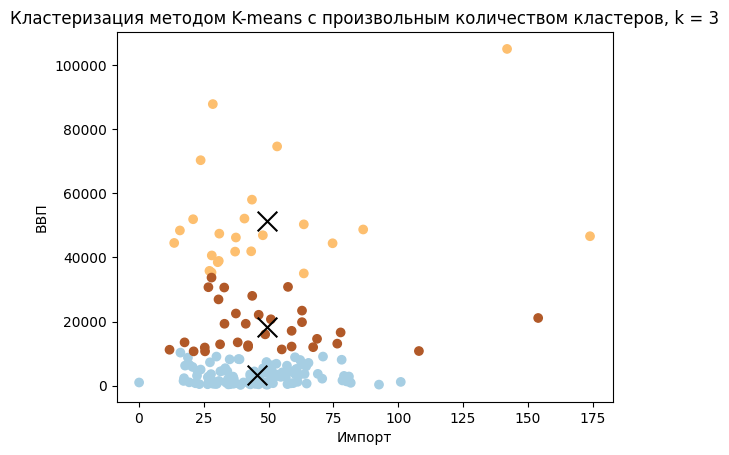

In [ ]:
# Выберем произвольное количество кластеров, например, 3:
# Выберем столбцы с показателями импорта и ВВП
X = country[['imports', 'gdpp']]
# Произвольный выбор количества кластеров (k=3)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
country['cluster'] = labels
plt.scatter(X['imports'], X['gdpp'], c=labels, cmap='Paired')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black')
plt.xlabel('Импорт')
plt.ylabel('ВВП')
plt.title('Кластеризация методом K-means с произвольным количеством кластеров, k = 3')
plt.show()

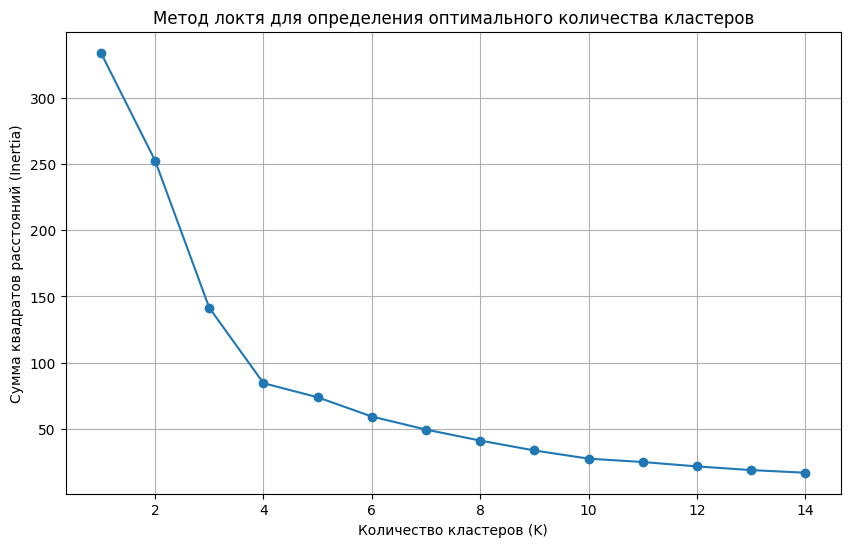

In [ ]:
# Для подбора оптимального числа кластеров для алгоритма K-means применим метод локтя.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Сумма квадратов расстояний (Inertia)')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.grid(True)
plt.show()


По данному графику остановимся на 4 кластерах.

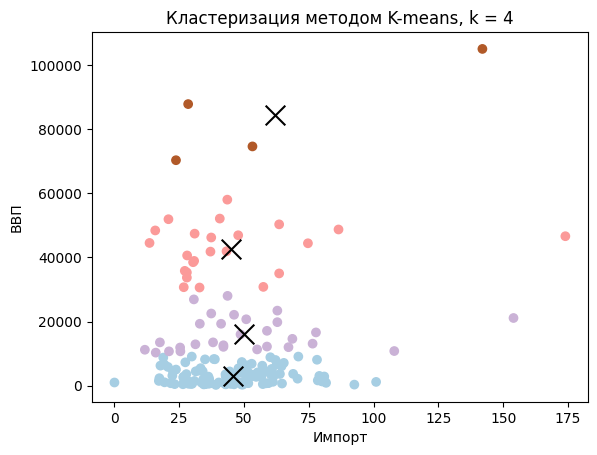

In [ ]:
# Оптимальное количество кластеров (k=4)
kmeans_opt = KMeans(n_clusters=4, random_state=42).fit(X)
labels_opt = kmeans_opt.labels_
centroids_opt = kmeans_opt.cluster_centers_

# Добавление меток кластеров в DataFrame
country['optimal_cluster'] = labels_opt

# Визуализация результатов
plt.scatter(X['imports'], X['gdpp'], c=labels_opt, cmap='Paired')
plt.scatter(centroids_opt[:, 0], centroids_opt[:, 1], marker='x', s=200, c='black')
plt.xlabel('Импорт')
plt.ylabel('ВВП')
plt.title('Кластеризация методом K-means, k = 4')
plt.show()

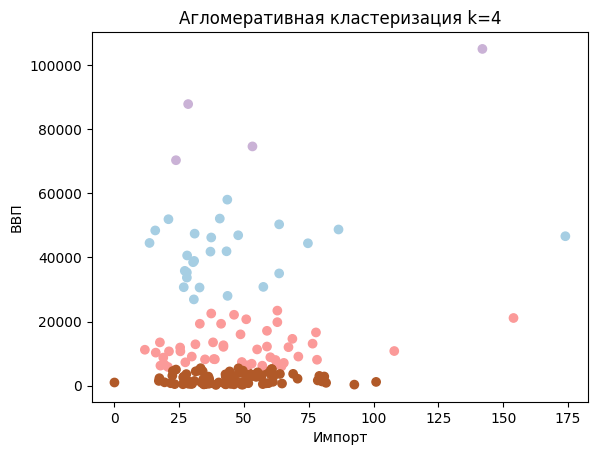

In [ ]:
# Агломеративная кластеризация с k=4
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X)

# Добавление меток кластеров в DataFrame
country['agglomerative_cluster'] = labels_agg

# Визуализация результатов
plt.scatter(X['imports'], X['gdpp'], c=labels_agg, cmap='Paired')
plt.xlabel('Импорт')
plt.ylabel('ВВП')
plt.title('Агломеративная кластеризация k=4')
plt.show()



**Выводы:**

Мы использовали столбцы ВВП и импорт для того, чтобы выделить экономический аспект и выявить страны с похожими уровнями экономического развития.
По полученному результату мы получили страны со схожим ВВП и импортом в одном кластере. Мы видим наибольшую концентрацию стран с ВВП ниже 10000 на душу населения и малое количетство стран с ВВП вышем 60000.
